<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-12-15 22:36:11--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  78.9MB/s    in 1.9s    

2025-12-15 22:36:13 (78.9 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load the data


In [9]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [10]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



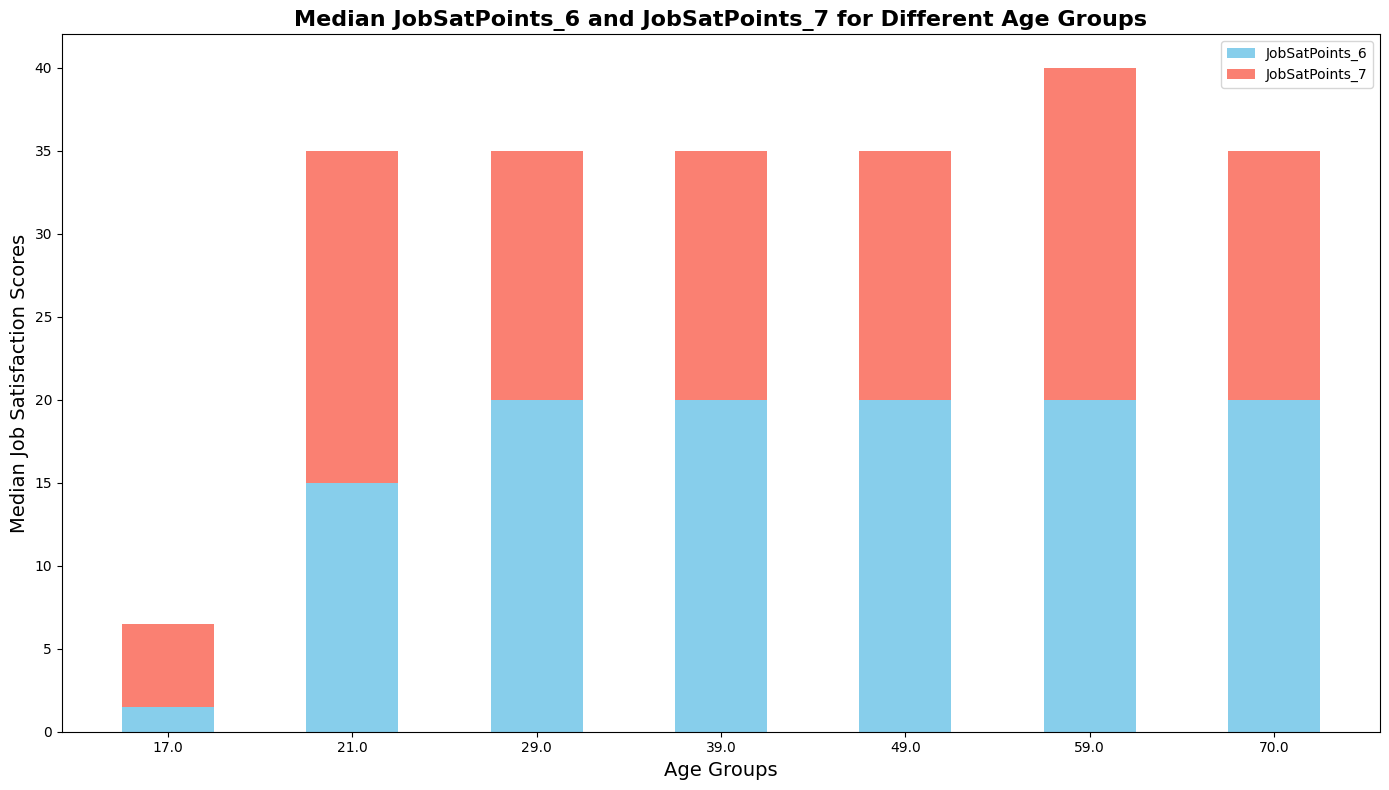

In [11]:
# Convert the 'Age' column to numeric values for grouping
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 29, '35-44 years old': 39,
    '45-54 years old': 49, '55-64 years old': 59, '65 years or older': 70, 'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Filter out rows with missing values in 'JobSatPoints_6', 'JobSatPoints_7', and 'AgeNum'
df_filtered = df.dropna(subset=['JobSatPoints_6', 'JobSatPoints_7', 'AgeNum'])

# Calculate the median job satisfaction scores for each age group
job_satisfaction_median = df_filtered.groupby('AgeNum')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Define bar width and positions
bar_width = 0.5
age_groups = np.arange(len(job_satisfaction_median))

# Plot the bars for JobSatPoints_6 and JobSatPoints_7
bar1 = ax.bar(age_groups, job_satisfaction_median['JobSatPoints_6'], bar_width, label='JobSatPoints_6', color='skyblue')
bar2 = ax.bar(age_groups, job_satisfaction_median['JobSatPoints_7'], bar_width, bottom=job_satisfaction_median['JobSatPoints_6'], label='JobSatPoints_7', color='salmon')

# Add labels and title
ax.set_xlabel('Age Groups', fontsize=14)
ax.set_ylabel('Median Job Satisfaction Scores', fontsize=14)
ax.set_title('Median JobSatPoints_6 and JobSatPoints_7 for Different Age Groups', fontsize=16, fontweight='bold')
ax.set_xticks(age_groups)
ax.set_xticklabels(job_satisfaction_median.index)
ax.legend()

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


/tmp/ipykernel_771/2565258390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['EmploymentGroup'] = df_filtered['Employment'].map(employment_mapping)


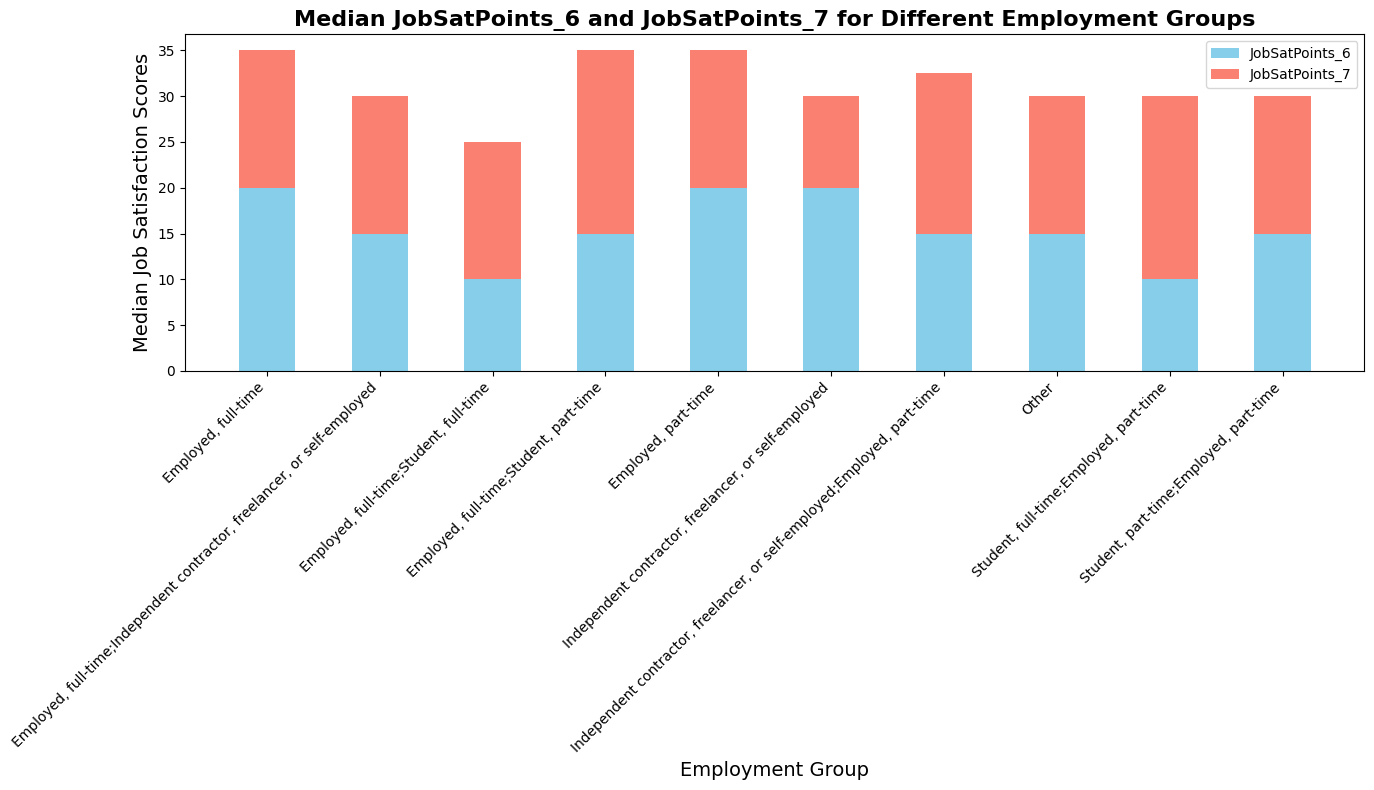

In [13]:
# Filter out rows with missing values in 'JobSatPoints_6', 'JobSatPoints_7', and 'Employment'
df_filtered = df.dropna(subset=['JobSatPoints_6', 'JobSatPoints_7', 'Employment'])

# Count the number of respondents for each employment status
employment_counts = df_filtered['Employment'].value_counts()

# Define the number of categories to display (for example, top 10)
num_categories = 10

# Group other employment statuses into 'Other'
employment_counts_top = employment_counts.head(num_categories - 1)
employment_counts_top['Other'] = employment_counts[num_categories - 1:].sum()

# Map the employment statuses to the grouped categories
employment_mapping = {status: status if status in employment_counts_top.index else 'Other' for status in df['Employment'].unique()}
df_filtered['EmploymentGroup'] = df_filtered['Employment'].map(employment_mapping)

# Calculate the median job satisfaction scores for each employment group
job_satisfaction_median = df_filtered.groupby('EmploymentGroup', observed=False)[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Define bar width and positions
bar_width = 0.5
employment_groups = np.arange(len(job_satisfaction_median))

# Plot the bars for JobSatPoints_6 and JobSatPoints_7
bar1 = ax.bar(employment_groups, job_satisfaction_median['JobSatPoints_6'], bar_width, label='JobSatPoints_6', color='skyblue')
bar2 = ax.bar(employment_groups, job_satisfaction_median['JobSatPoints_7'], bar_width, bottom=job_satisfaction_median['JobSatPoints_6'], label='JobSatPoints_7', color='salmon')

# Add labels and title
ax.set_xlabel('Employment Group', fontsize=14)
ax.set_ylabel('Median Job Satisfaction Scores', fontsize=14)
ax.set_title('Median JobSatPoints_6 and JobSatPoints_7 for Different Employment Groups', fontsize=16, fontweight='bold')
ax.set_xticks(employment_groups)
ax.set_xticklabels(job_satisfaction_median.index, rotation=45, ha='right')
ax.legend()

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


/tmp/ipykernel_771/847235212.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = age_filtered_df.groupby('CompensationRange')[['ConvertedCompYearly', 'JobSatPoints_6']].median()


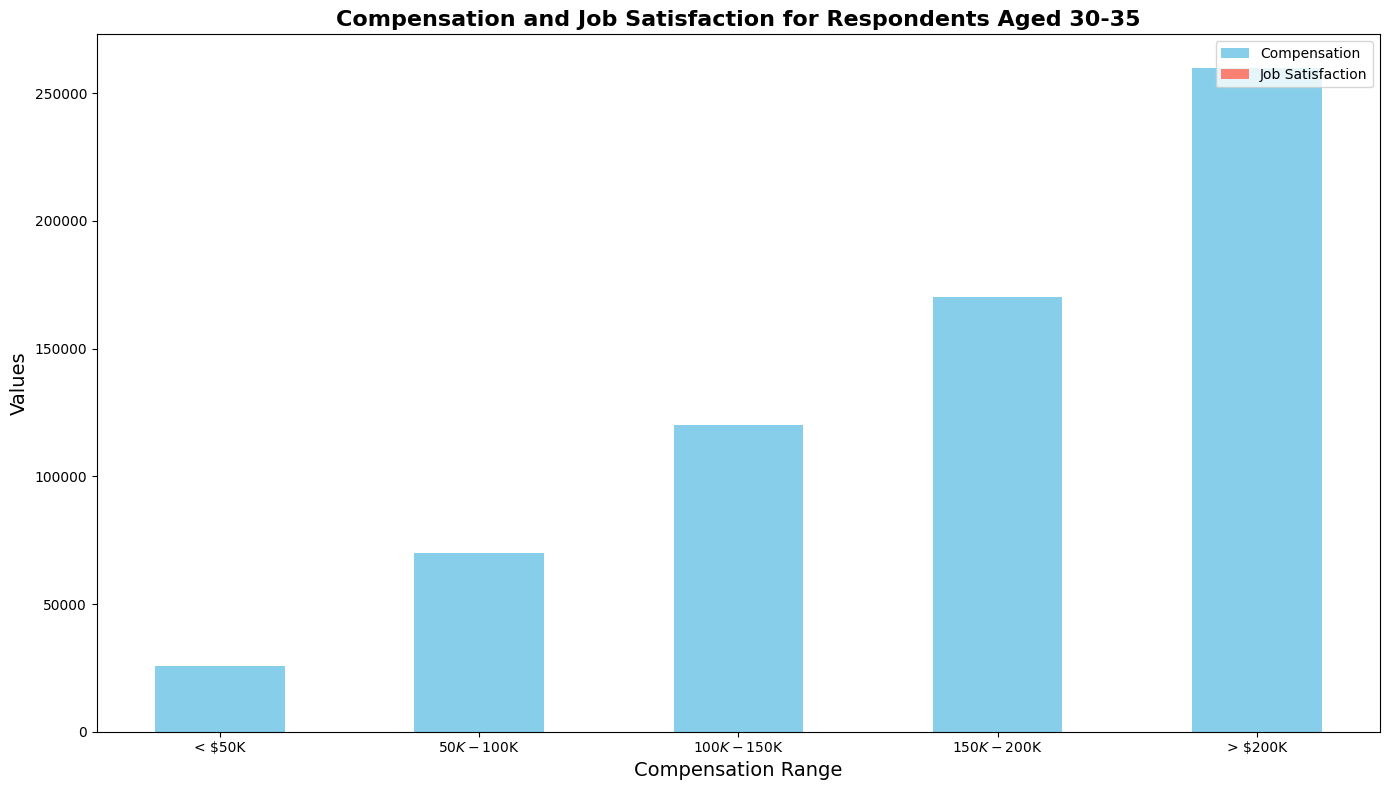

In [14]:
# Convert the 'Age' column to numeric values for grouping
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 32, '35-44 years old': 39,
    '45-54 years old': 49, '55-64 years old': 59, '65 years or older': 70, 'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Filter the data for respondents aged 30-35
age_filtered_df = df[(df['AgeNum'] >= 30) & (df['AgeNum'] <= 35)]

# Filter out rows with missing values in 'ConvertedCompYearly' and 'JobSatPoints_6'
age_filtered_df = age_filtered_df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Group the ConvertedCompYearly column into compensation ranges
compensation_bins = [0, 50000, 100000, 150000, 200000, np.inf]
compensation_labels = ['< $50K', '$50K-$100K', '$100K-$150K', '$150K-$200K', '> $200K']
age_filtered_df['CompensationRange'] = pd.cut(age_filtered_df['ConvertedCompYearly'], bins=compensation_bins, labels=compensation_labels)

# Calculate the median job satisfaction scores and compensation for each range
grouped_data = age_filtered_df.groupby('CompensationRange')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Define bar width and positions
bar_width = 0.5
compensation_ranges = np.arange(len(grouped_data))

# Plot the bars for ConvertedCompYearly and JobSatPoints_6
bar1 = ax.bar(compensation_ranges, grouped_data['ConvertedCompYearly'], bar_width, label='Compensation', color='skyblue')
bar2 = ax.bar(compensation_ranges, grouped_data['JobSatPoints_6'], bar_width, bottom=grouped_data['ConvertedCompYearly'], label='Job Satisfaction', color='salmon')

# Add labels and title
ax.set_xlabel('Compensation Range', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
ax.set_title('Compensation and Job Satisfaction for Respondents Aged 30-35', fontsize=16, fontweight='bold')
ax.set_xticks(compensation_ranges)
ax.set_xticklabels(grouped_data.index)
ax.legend(loc='upper right')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


/tmp/ipykernel_771/179569212.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CompensationRange'] = pd.cut(df_filtered['ConvertedCompYearly'], bins=compensation_bins, labels=compensation_labels)
/tmp/ipykernel_771/179569212.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_filtered.groupby(['AgeNum', 'CompensationRange'])[['ConvertedCompYearly', 'JobSatPoints_6']].median().unstack()


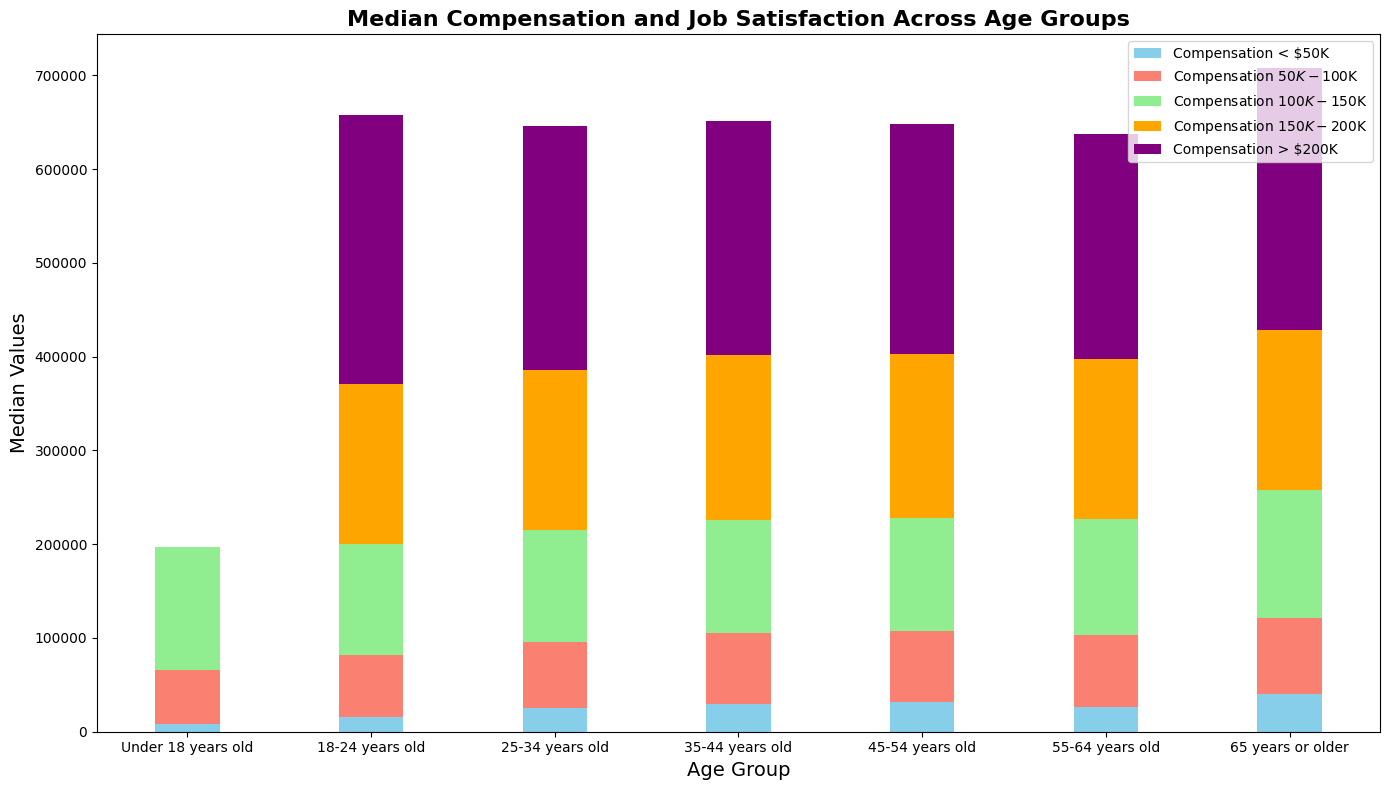

In [15]:
# Convert the 'Age' column to numeric values for grouping
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 29, '35-44 years old': 39,
    '45-54 years old': 49, '55-64 years old': 59, '65 years or older': 70, 'Prefer not to say': None
}
age_labels = {
    17: 'Under 18 years old', 21: '18-24 years old', 29: '25-34 years old', 39: '35-44 years old',
    49: '45-54 years old', 59: '55-64 years old', 70: '65 years or older'
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Filter out rows with missing values in 'ConvertedCompYearly', 'JobSatPoints_6', and 'AgeNum'
df_filtered = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'AgeNum'])

# Group the ConvertedCompYearly column into compensation ranges
compensation_bins = [0, 50000, 100000, 150000, 200000, np.inf]
compensation_labels = ['< $50K', '$50K-$100K', '$100K-$150K', '$150K-$200K', '> $200K']
df_filtered['CompensationRange'] = pd.cut(df_filtered['ConvertedCompYearly'], bins=compensation_bins, labels=compensation_labels)

# Calculate the median compensation and job satisfaction scores for each age group and compensation range
grouped_data = df_filtered.groupby(['AgeNum', 'CompensationRange'])[['ConvertedCompYearly', 'JobSatPoints_6']].median().unstack()

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Define bar width and positions
bar_width = 0.35
age_groups = np.arange(len(grouped_data))

# Plot the bars for each compensation range
bottom = np.zeros(len(grouped_data))
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple']
for idx, comp_range in enumerate(compensation_labels):
    comp_values = grouped_data['ConvertedCompYearly'][comp_range]
    job_sat_values = grouped_data['JobSatPoints_6'][comp_range]
    ax.bar(age_groups, comp_values, bar_width, label=f'Compensation {comp_range}', color=colors[idx], bottom=bottom)
    bottom += comp_values

# Add labels and title
ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Median Values', fontsize=14)
ax.set_title('Median Compensation and Job Satisfaction Across Age Groups', fontsize=16, fontweight='bold')
ax.set_xticks(age_groups)
ax.set_xticklabels([age_labels[age] for age in grouped_data.index])
ax.legend(loc='upper right')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


In [ ]:
# Convert the 'Age' column to numeric values for grouping
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 29, '35-44 years old': 39,
    '45-54 years old': 49, '55-64 years old': 59, '65 years or older': 70, 'Prefer not to say': None
}
age_labels = {
    17: 'Under 18 years old', 21: '18-24 years old', 29: '25-34 years old', 39: '35-44 years old',
    49: '45-54 years old', 59: '55-64 years old', 70: '65 years or older'
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Explode the 'DatabaseWantToWorkWith' column by splitting it by ';' and stacking the results
df_exploded = df.dropna(subset=['DatabaseWantToWorkWith'])
df_exploded = df_exploded.assign(DatabaseWantToWorkWith=df_exploded['DatabaseWantToWorkWith'].str.split(';')).explode('DatabaseWantToWorkWith')

# Filter out rows with missing values in 'AgeNum' and 'DatabaseWantToWorkWith'
df_exploded = df_exploded.dropna(subset=['AgeNum', 'DatabaseWantToWorkWith'])

# Get the top databases
top_databases = df_exploded['DatabaseWantToWorkWith'].value_counts().head(5).index

# Filter the DataFrame for only the top databases
df_exploded = df_exploded[df_exploded['DatabaseWantToWorkWith'].isin(top_databases)]

# Calculate the proportion of each database within each age group
grouped_data = df_exploded.groupby(['AgeNum', 'DatabaseWantToWorkWith']).size().unstack().fillna(0)
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Define bar width and positions
bar_width = 0.85
age_groups = np.arange(len(grouped_data))

# Plot the bars for each database
bottom = np.zeros(len(grouped_data))
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple']
for idx, database in enumerate(top_databases):
    values = grouped_data[database]
    ax.bar(age_groups, values, bar_width, label=database, color=colors[idx], bottom=bottom)
    bottom += values

# Add labels and title
ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Proportion', fontsize=14)
ax.set_title('Preferred Databases by Age Group', fontsize=16, fontweight='bold')
ax.set_xticks(age_groups)
ax.set_xticklabels([age_labels[age] for age in grouped_data.index])
ax.legend(loc='upper right')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


In [ ]:
##Write your code here

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


In [ ]:
##Write your code here

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [ ]:
##Write your code here

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
